In [3]:
# Import necessary libraries
import os
import sys

# Add the scripts folder to the Python path
sys.path.append(os.path.abspath("../scripts"))

# Import functions
from load_data import fetch_data
from visualizations import plot_histograms



In [4]:
# SQL query to fetch data
query = "SELECT * FROM xdr_data ;"  

# Load the data
df = fetch_data(query)

# Display the first 5 rows of the DataFrame
print("Preview of the data:")
df.head()

d:\Kifya_training\Week 2\Telecom-User-Analysis-and-Dashboard-Development\scripts\load_data.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Preview of the data:


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
# Check the shape of the dataset (rows, columns)
print("Shape of the dataset (rows, columns):")
print(df.shape)


Shape of the dataset (rows, columns):
(150001, 55)


In [6]:
# Check the data types of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)        

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Display the columns with missing values
print("Missing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754


In [8]:
# For numeric columns, fill missing values with the median
numeric_cols = df.select_dtypes(include='float64').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# For categorical columns, fill missing values with the most frequent value (mode)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that missing values have been handled
missing_values_after = df.isnull().sum()
print("Missing values after handling:")
print(missing_values_after[missing_values_after > 0])


Missing values after handling:
Series([], dtype: int64)


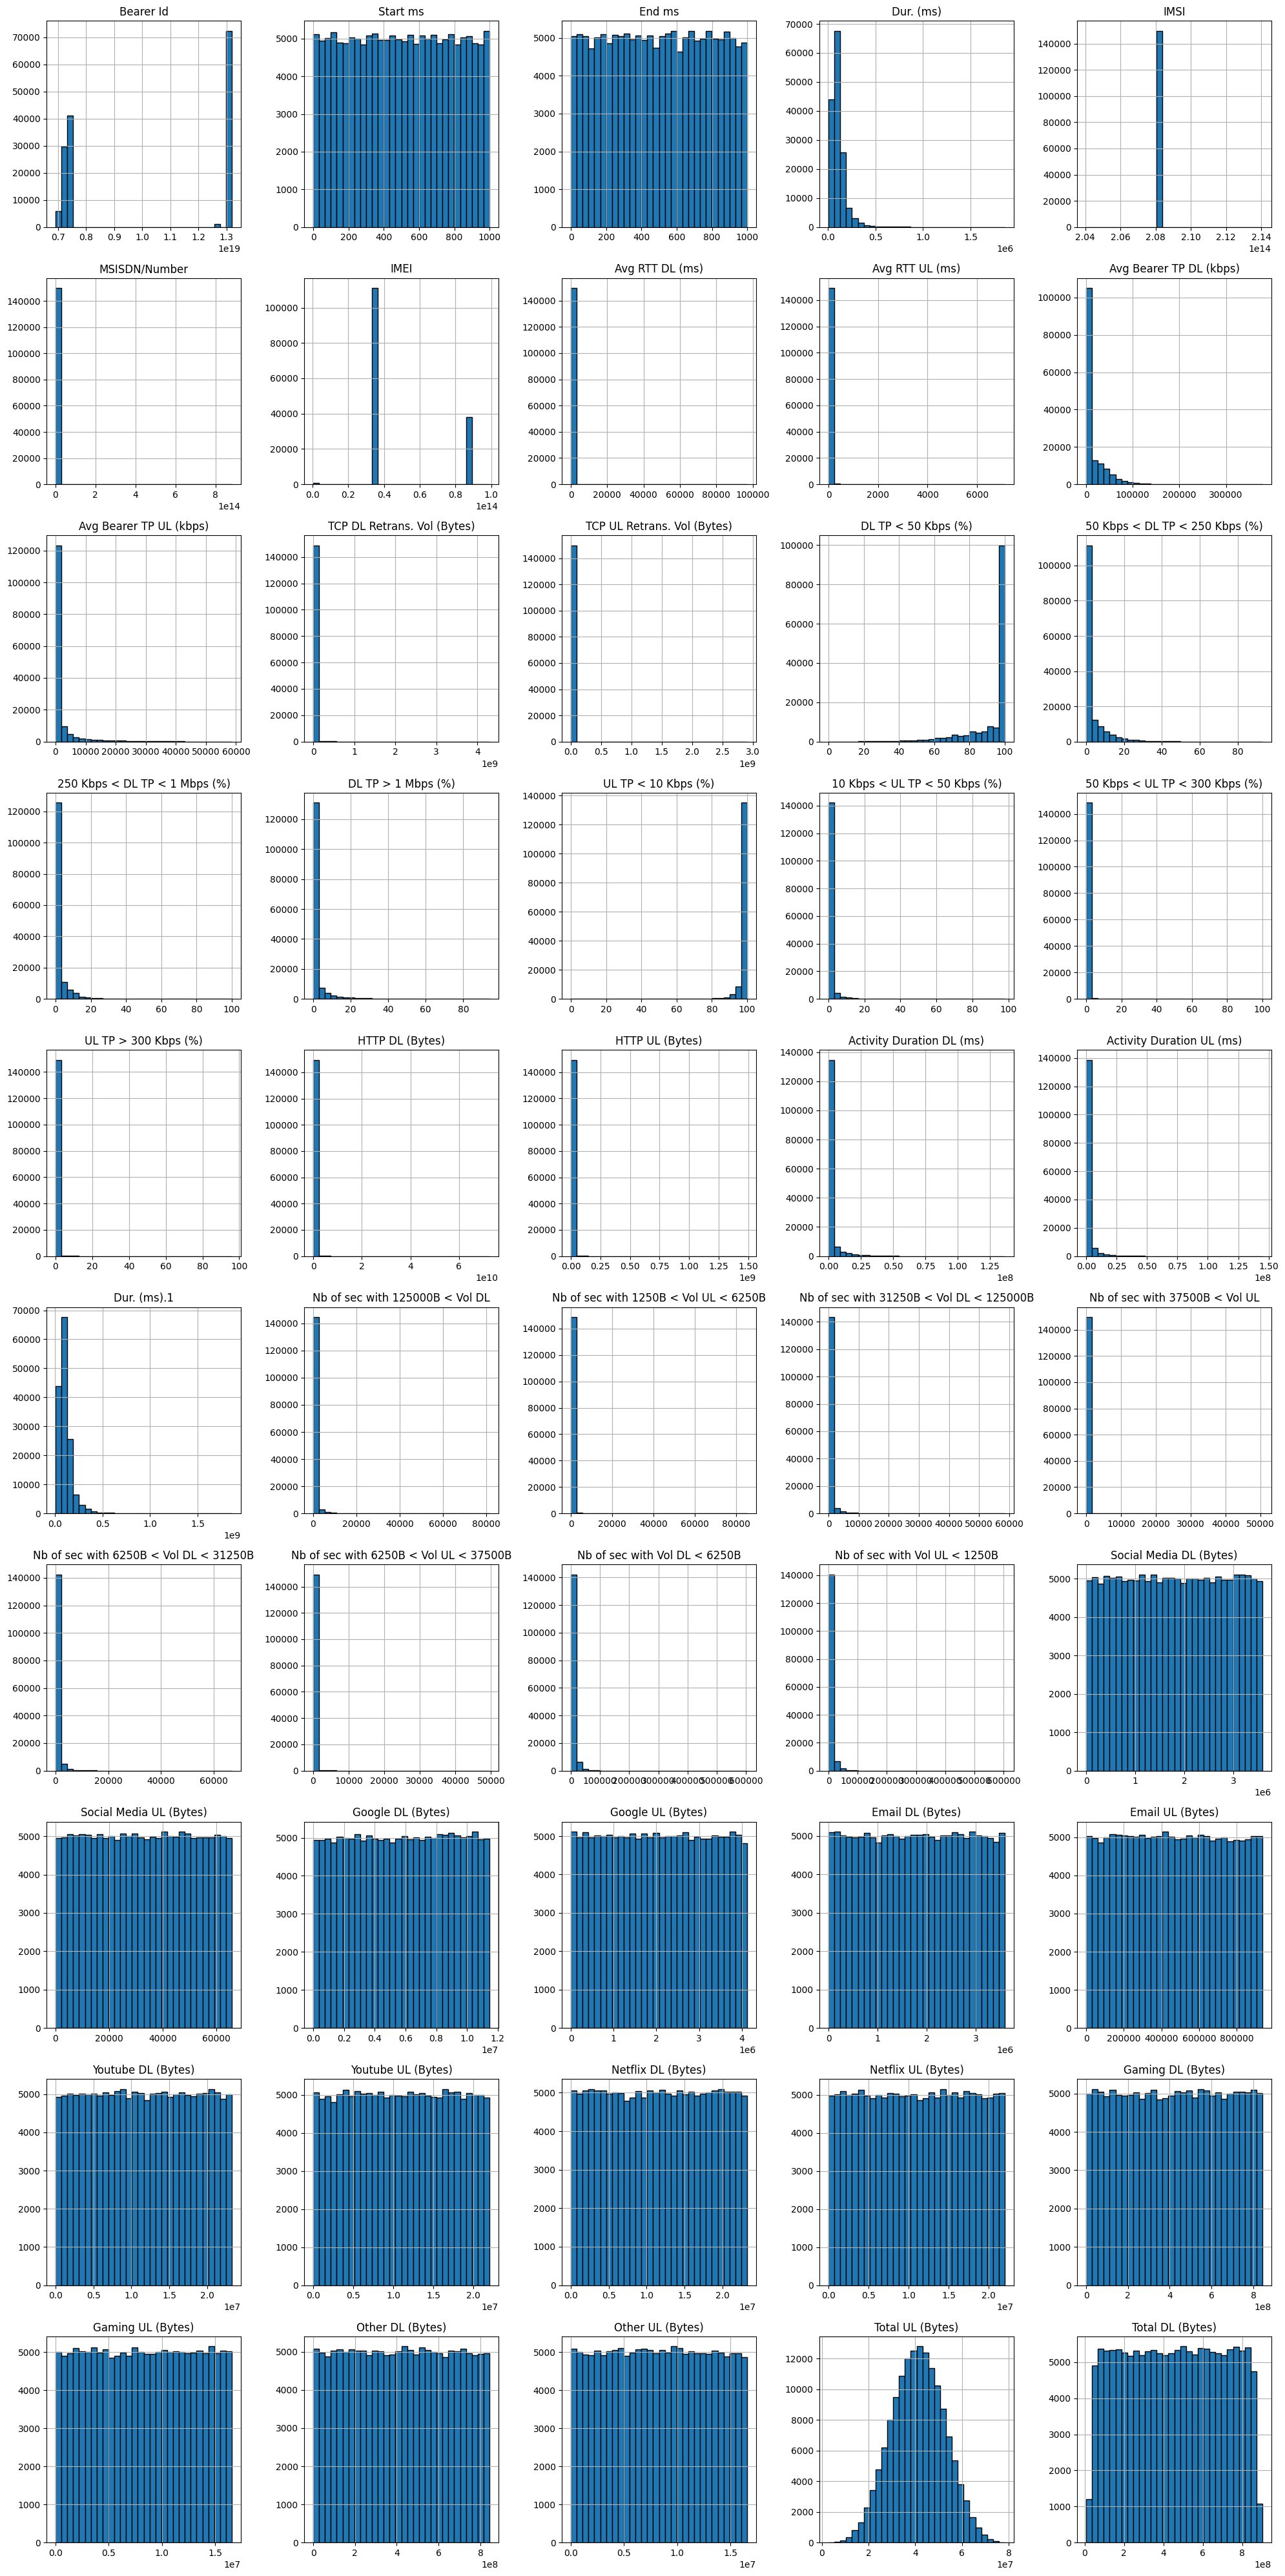

In [9]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Call the function to plot histograms
plot_histograms(df, numeric_cols)


In [10]:
# Summary statistics for numeric columns
summary_stats = df[numeric_cols].describe()
print(summary_stats)


          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.500010e+05  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean   1.012045e+19     499.188199     498.800888  1.046084e+05  2.082016e+14   
std    2.892438e+18     288.610872     288.096693  8.103736e+04  2.144723e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744200e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324300e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.182441e+10  4.842592e+13        97.774455        15.315031   
std     2.438731e+12  2.238739e+13       559.909444   

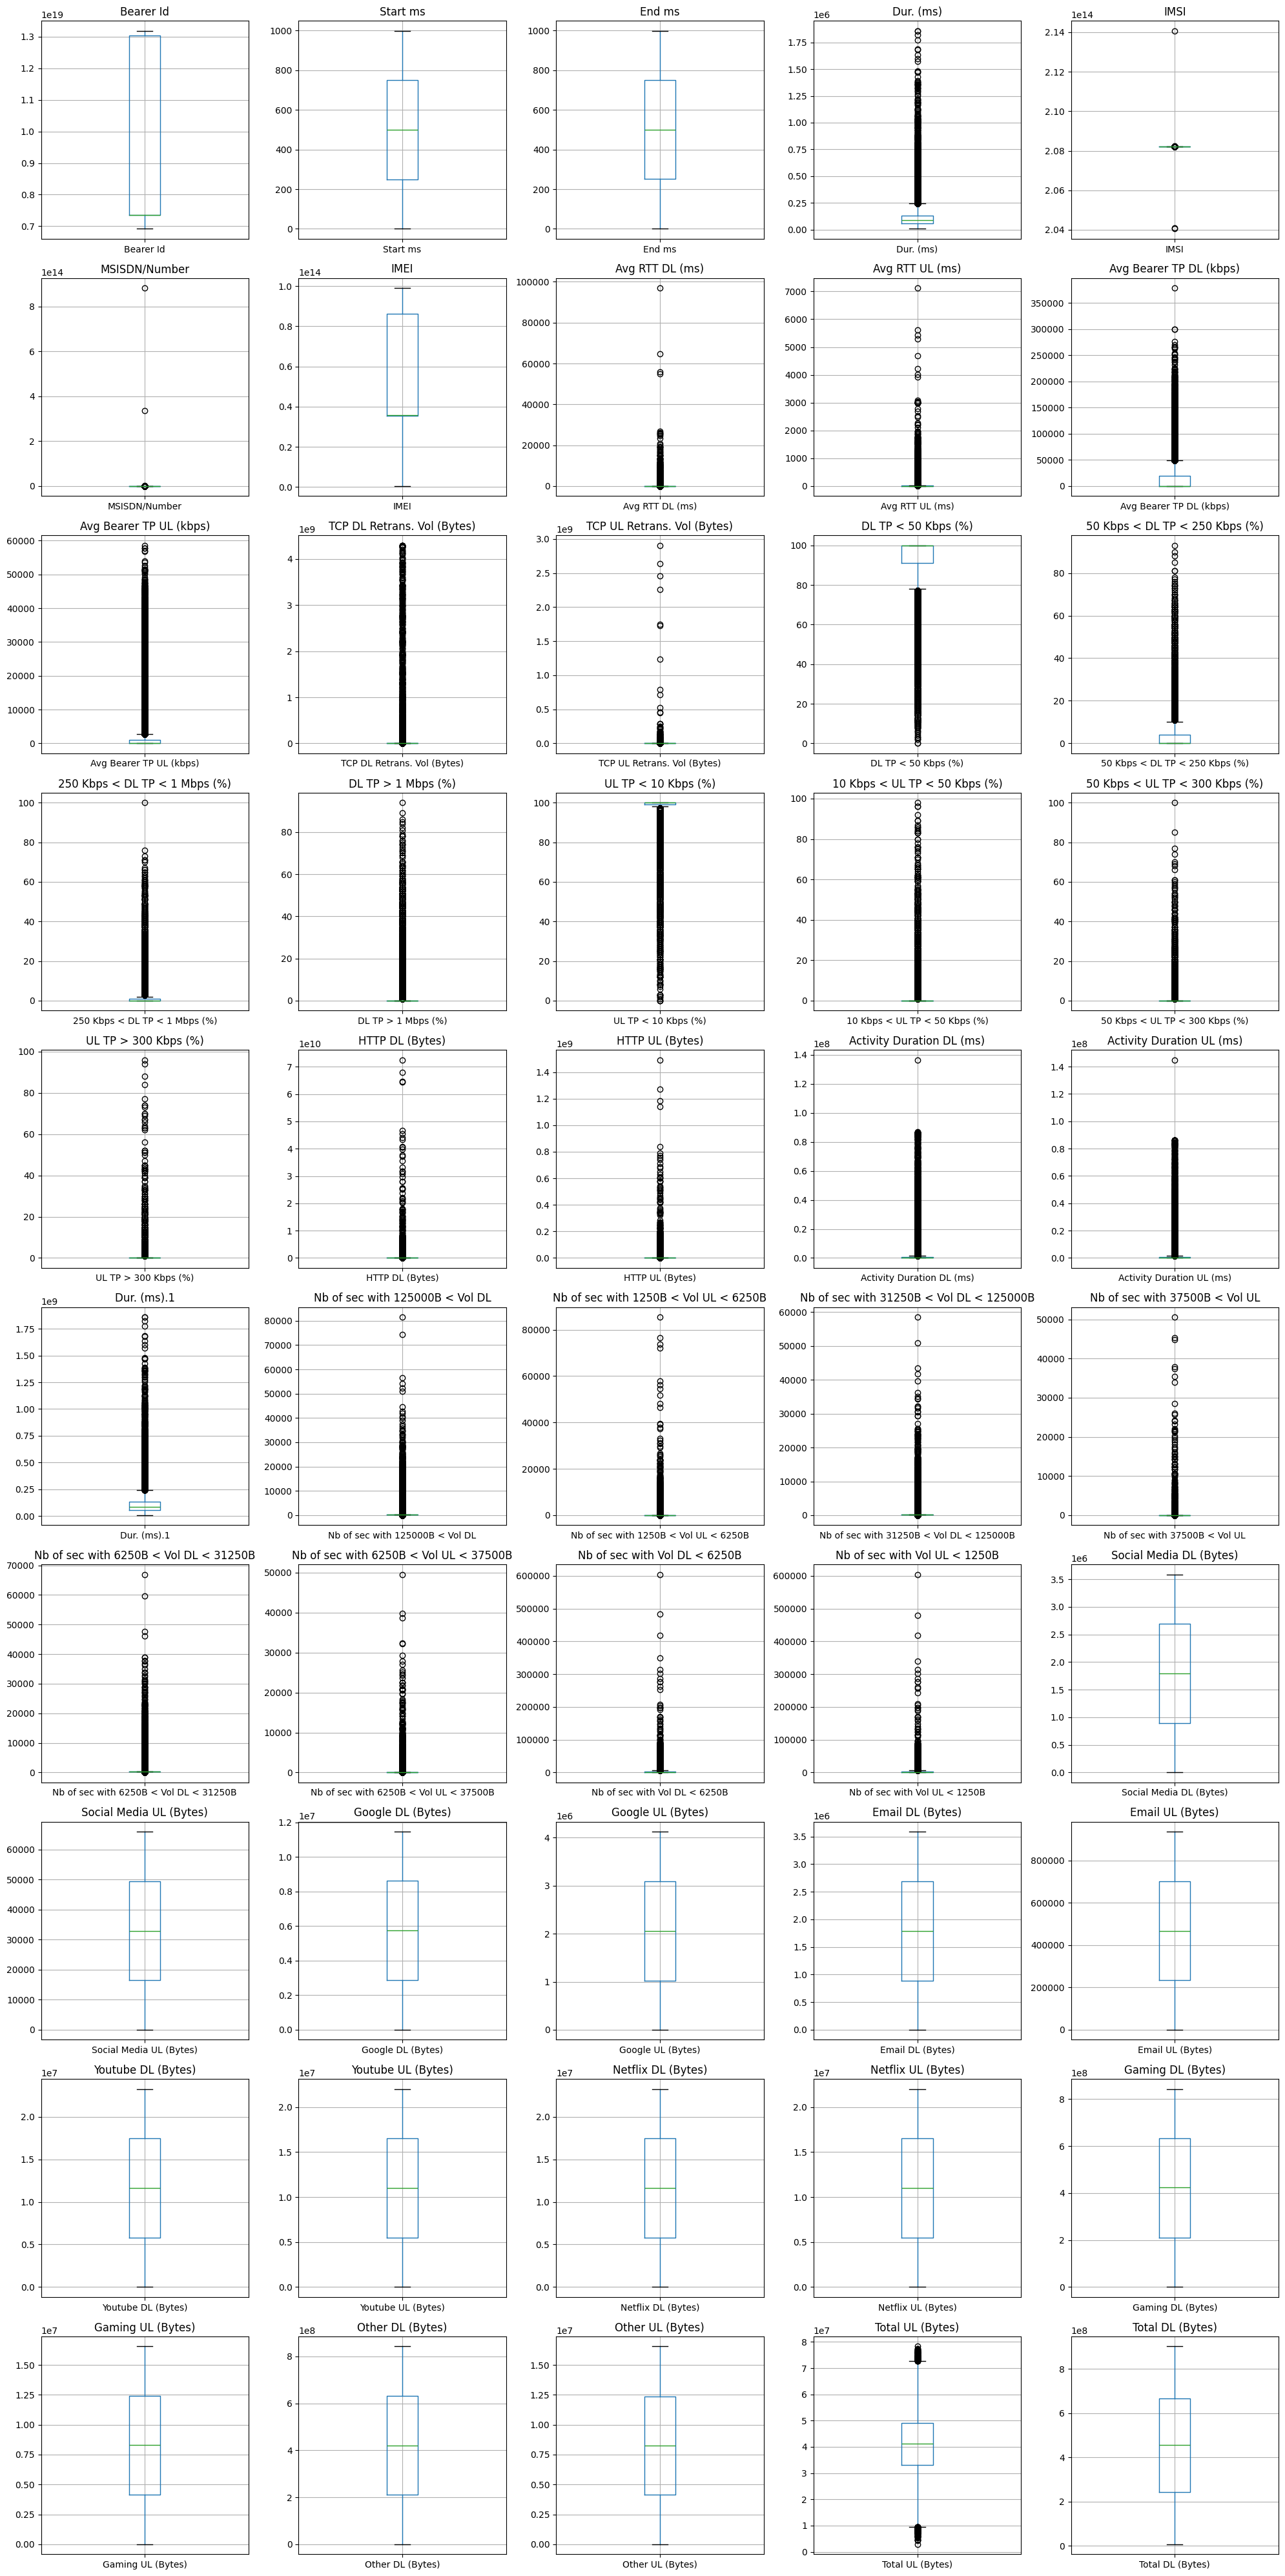

In [11]:
#plot_boxplots
plot_boxplots(df, numeric_cols)